# EDA : Analyse Exploratoire des données


## Imports

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


## Chargement du dataset

In [1]:
TACO_DATASET_ROOT_PATH = r"N:\My Drive\KESKIA Drive Mlamali\datasets\taco-2gb"
taco_meta_df = pd.read_csv(f'{TACO_DATASET_ROOT_PATH}/meta_df.csv')
print(f"shape : {taco_meta_df.shape}")
taco_meta_df

NameError: ignored

### Overview

In [ ]:
taco_meta_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_id         4784 non-null   int64  
 1   img_width      4784 non-null   int64  
 2   img_height     4784 non-null   int64  
 3   img_file       4784 non-null   object 
 4   cat_id         4784 non-null   int64  
 5   cat_name       4784 non-null   object 
 6   supercategory  4784 non-null   object 
 7   ann_id         4784 non-null   int64  
 8   x              4784 non-null   float64
 9   y              4784 non-null   float64
 10  width          4784 non-null   float64
 11  height         4784 non-null   float64
 12  area           4784 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 486.0+ KB


### Stats

In [ ]:
taco_meta_df.describe().T

,count,mean,std,min,25%,50%,75%,max
img_id,4784.0,756.936037,445.884396,0.000000,354.75,743.00,1154.000,1499.0
img_width,4784.0,2794.278428,714.851079,842.000000,2448.00,2448.00,3264.000,6000.0
img_height,4784.0,3234.358278,837.244672,474.000000,2448.00,3264.00,4000.000,5312.0
cat_id,4784.0,34.079013,20.081707,0.000000,12.00,36.00,57.000,59.0
ann_id,4784.0,2391.949833,1381.264283,1.000000,1195.75,2392.50,3588.250,4783.0
x,4784.0,1232.285117,703.739763,-1.000000,741.60,1150.00,1612.000,5573.0
y,4784.0,1485.067894,826.005410,-1.316667,892.75,1414.00,1961.250,5208.0
width,4784.0,331.434419,440.431739,10.000000,68.00,179.50,405.250,3758.0
height,4784.0,320.246833,442.046602,4.000000,62.00,159.00,387.000,3995.0
area,4784.0,150407.154132,485084.750277,55.500000,2142.00,14244.75,75333.125,7328035.5


### Missing Values
Vérification si présence des valeurs manquantes

<Axes: title={'center': 'Missing Values'}>

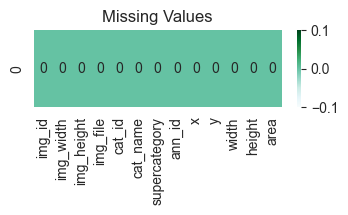

In [ ]:
#Valeurs nulles
fig, ax = plt.subplots(figsize=(4,1))
plt.title('Missing Values')
nans = taco_meta_df.isna().sum().sort_values(ascending=False).to_frame().T
sns.heatmap(nans,annot=True,fmt='d',cmap='BuGn')

### Duplicates

In [ ]:
taco_meta_df.duplicated().sum()

0

## Class "cat_name" Distribution

In [ ]:
taco_meta_df['cat_name'].value_counts()

cat_name
Cigarette                    667
Unlabeled litter             517
Plastic film                 451
Clear plastic bottle         285
Other plastic                273
Other plastic wrapper        260
Drink can                    229
Plastic bottle cap           209
Plastic straw                157
Broken glass                 138
Styrofoam piece              112
Disposable plastic cup       104
Glass bottle                 104
Pop tab                       99
Other carton                  93
Normal paper                  82
Metal bottle cap              80
Plastic lid                   77
Paper cup                     67
Corrugated carton             64
Aluminium foil                62
Single-use carrier bag        61
Other plastic bottle          50
Drink carton                  45
Tissues                       42
Crisp packet                  39
Disposable food container     38
Plastic utensils              37
Food Can                      34
Garbage bag                   31
M

<Axes: title={'center': 'Cat_name Distribution'}, ylabel='cat_name'>

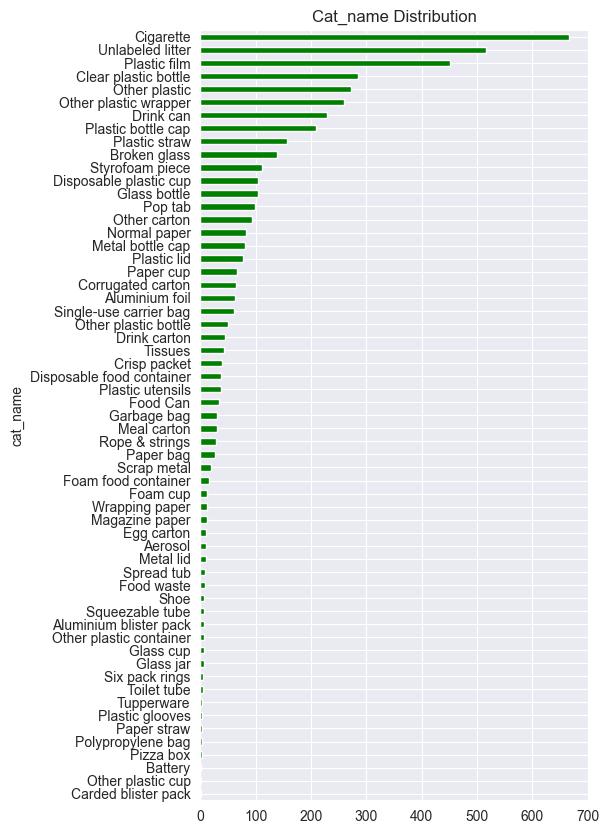

In [ ]:
taco_meta_df['cat_name'].value_counts(ascending=True).plot(kind='barh', figsize=(5,10), title='Cat_name Distribution', color='green')

In [ ]:
taco_meta_df['cat_name'].unique().tolist()

['Glass bottle',
 'Meal carton',
 'Other carton',
 'Clear plastic bottle',
 'Plastic bottle cap',
 'Drink can',
 'Food Can',
 'Other plastic bottle',
 'Pop tab',
 'Aerosol',
 'Glass cup',
 'Other plastic wrapper',
 'Styrofoam piece',
 'Plastic film',
 'Other plastic',
 'Drink carton',
 'Metal bottle cap',
 'Disposable food container',
 'Normal paper',
 'Paper cup',
 'Cigarette',
 'Single-use carrier bag',
 'Tissues',
 'Toilet tube',
 'Crisp packet',
 'Plastic lid',
 'Metal lid',
 'Egg carton',
 'Plastic straw',
 'Paper bag',
 'Disposable plastic cup',
 'Broken glass',
 'Plastic utensils',
 'Glass jar',
 'Food waste',
 'Squeezable tube',
 'Spread tub',
 'Shoe',
 'Garbage bag',
 'Aluminium foil',
 'Six pack rings',
 'Foam cup',
 'Paper straw',
 'Corrugated carton',
 'Unlabeled litter',
 'Aluminium blister pack',
 'Battery',
 'Rope & strings',
 'Other plastic container',
 'Polypropylene bag',
 'Scrap metal',
 'Magazine paper',
 'Pizza box',
 'Plastic glooves',
 'Wrapping paper',
 'Carded 

## Class "supercategory" Distribution

In [ ]:
taco_meta_df['supercategory'].value_counts()

supercategory
Plastic bag & wrapper    850
Cigarette                667
Unlabeled litter         517
Bottle                   439
Bottle cap               289
Can                      273
Other plastic            273
Carton                   251
Cup                      192
Straw                    161
Paper                    148
Broken glass             138
Styrofoam piece          112
Pop tab                   99
Lid                       87
Plastic container         72
Aluminium foil            62
Plastic utensils          37
Rope & strings            29
Paper bag                 27
Scrap metal               20
Food waste                 8
Shoe                       7
Squeezable tube            7
Blister pack               7
Glass jar                  6
Plastic glooves            4
Battery                    2
Name: count, dtype: int64

<Axes: title={'center': 'SuperCategory Distribution'}, ylabel='supercategory'>

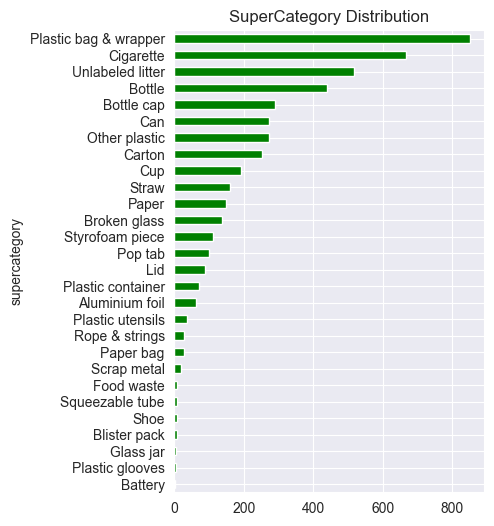

In [ ]:
taco_meta_df['supercategory'].value_counts(ascending=True).plot(kind='barh', figsize=(4,6), title='SuperCategory Distribution', color='green')

## Width & Height Distribution

In [ ]:
taco_meta_df['width'].value_counts()

In [ ]:
# negatif value ??

In [ ]:
taco_meta_df.groupby(["img id"])

NameError: name 'taco_meta_df' is not defined

## Aera

In [ ]:
# area boxplot by category
# multiple plot
n_cols = 2

# create figure and axes



## Ann

<Axes: title={'center': 'Ann_id Distribution'}, ylabel='Frequency'>

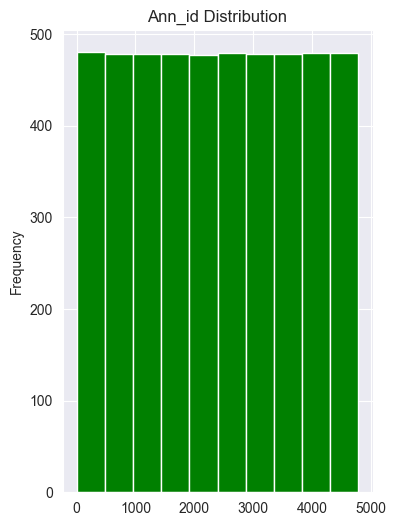

# Visualisation

## 1- Distribution des tailles d'images

### Il est question de comprendre la variété des tailles d'images

In [ ]:
DeepnoteChart(meta_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"img_width","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"img_height","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## 2- Distribution d'images par catégories

Il est question de voir ici quelles catégories sont les plus fréquentes ou moins représentées

In [ ]:
DeepnoteChart(meta_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"cat_name","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"datum":"Count of Records"},"xOffset":{"datum":"Count of Records"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
meta_df["cat_name"].unique().tolist()

Bouteille en verre 🍾
Carton de repas 🥡
Autre carton 📦
Bouteille en plastique transparent 🧴
Bouchon de bouteille en plastique 🚮
Canette de boisson 🥫
Boîte de conserve 🛢
Autre bouteille en plastique 🧴
Ouvre-canette 🥫
Aérosol 🎨
Verre en verre 🥃
Autre emballage plastique 🍬
Morceau de polystyrène 🍽
Film plastique 🎞
Autre plastique 🚮
Carton à boisson 🧃
Capsule en métal 🍾
Conteneur alimentaire jetable 🍱
Papier ordinaire 📄
Gobelet en papier 🥤
Cigarette 🚬
Sac à usage unique 🛍
Mouchoirs 🤧
Tube de papier toilette 🧻
Paquet de chips 🍟
Couvercle en plastique 🥡
Couvercle en métal 🥫
Boîte à œufs 🥚
Paille en plastique 🥤
Sac en papier 🛍
Gobelet plastique jetable 🥤
Verre brisé 🔨

In [ ]:
meta_df["supercategory"].unique().list()

## 3- Analyse des SuperCategories

### Répartition des supercatégories

In [ ]:
DeepnoteChart(meta_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"supercategory","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## 4- Taille des Objets

### Variété des tailles d'objets dans nos images

In [ ]:
DeepnoteChart(meta_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"area","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
DeepnoteChart(meta_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"x","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"y","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

## 5- Annotation sur les images

### Analyse du fichier annotation.json

### Lecture du fichier d'annotation

In [ ]:
url_annotation = '/work/datas/annotations.json'
img = '/work/datas'
with open(url_annotation, 'r') as f:
    annotations = json.load(f)

df_annotations = pd.json_normalize(annotations["images"])
df_annotations

In [ ]:
meta_df

In [ ]:
df_annotations.dtypes

In [ ]:
# Création du graphe
dot = Digraph('Dataset graph', filename='asd.gv')
dot.attr(rankdir='LR', size='8,10')
# Itérer sur chaque ligne du DataFrame pour construire le graphe
for index, row in meta_df.iterrows():
    cat_name = row['cat_name']
    supercategory = row['supercategory']
    # Ajouter un nœud pour chaque catégorie
    dot.node(cat_name)
    # Ajouter une arête entre la supercatégorie et la catégorie
    # On vérifie si la catégorie est différente de la supercatégorie pour éviter les boucles
    if cat_name != supercategory:
        dot.edge(supercategory, cat_name)

# Afficher le graphe
dot
# Pour enregistrer et visualiser le graphe en tant que PDF, décommentez la ligne suivante
#dot.view()


In [ ]:
def dessiner_annotations(ax, meta_df):
    for i, ann in tqdm(meta_df.iterrows(), total=len(meta_df)):
        #print(ann)
        rect = patches.Rectangle((ann['x'],ann['y']), ann['width'], ann['height'],linewidth=1,edgecolor='r', facecolor='none')
        ax.add_patch(rect)

for fichier in meta_df['img_file'].unique().tolist():
    if fichier.lower().endswith(('.png','.jpg','.jpeg')):
        # get all objects
        objects_rows = meta_df[meta_df["img_file"].isin([fichier])]
        print(fichier, objects_rows)

        che_img = os.path.join(img, fichier)
        image = Image.open(che_img)

        fig, ax = plt.subplots()
        ax.imshow(image)

        # Filtrer les annotations pour l'image actuelle
        annotations_filtrees = meta_df[meta_df['img_file'] == fichier]

        dessiner_annotations(ax, objects_rows)
        plt.show()

# Prédiction sur les Images en Batch

In [ ]:
import torch

In [ ]:
# Charger le modèle YOLO
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # Utilisez 'custom' pour votre propre modèle

# Chemin vers le dossier d'images
img_folder = '/work/datas/batch_1'
# Traiter les images en batch
for img_file in os.listdir(img_folder):
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(img_folder, img_file)
        results = model(img_path)
        results.show()  # ou results.save() pour enregistrer les résultats

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df3151b5-6b60-4a13-b0e6-37f2517c779c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>